In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [5]:
df=pd.read_csv('../data/raw_analyst_ratings.csv')

In [6]:
df.shape

(1407328, 6)

In [7]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [8]:
df.dtypes

Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

In [50]:
# forcing date column to be date time
pd.to_datetime(df['date'])

0         2020-06-05 14:30:54+00:00
1         2020-06-03 14:45:20+00:00
2         2020-05-26 08:30:07+00:00
3         2020-05-22 16:45:06+00:00
4         2020-05-22 15:38:59+00:00
                     ...           
1407323   2011-08-29 00:00:00+00:00
1407324   2011-06-22 00:00:00+00:00
1407325   2011-06-21 00:00:00+00:00
1407326   2011-06-21 00:00:00+00:00
1407327   2011-05-12 00:00:00+00:00
Name: date, Length: 1407328, dtype: datetime64[ns, UTC]

In [10]:
# show first 20 values (or a sample)
print(df['date'].head(20))

# show some unique formats / examples
print(df['date'].astype(str).sample(20, random_state=1).tolist())

# fast check: any strings that contain timezone offset or 'Z'?
import re
s = df['date'].astype(str)
has_tz = s.str.contains(r'([+-]\d{2}:?\d{2}|Z)$')  # looks for +00:00, +0000 or trailing Z
print("Has explicit tz (sample):", s[has_tz].head(10).tolist())
print("No tz (sample):", s[~has_tz].head(10).tolist())


0     2020-06-05 10:30:54-04:00
1     2020-06-03 10:45:20-04:00
2     2020-05-26 04:30:07-04:00
3     2020-05-22 12:45:06-04:00
4     2020-05-22 11:38:59-04:00
5     2020-05-22 11:23:25-04:00
6     2020-05-22 09:36:20-04:00
7     2020-05-22 09:07:04-04:00
8     2020-05-22 08:37:59-04:00
9     2020-05-22 08:06:17-04:00
10          2020-05-22 00:00:00
11          2020-05-22 00:00:00
12          2020-05-21 00:00:00
13          2020-05-21 00:00:00
14          2020-05-21 00:00:00
15          2020-05-21 00:00:00
16          2020-05-18 00:00:00
17          2020-05-16 00:00:00
18          2020-05-15 00:00:00
19          2020-05-08 00:00:00
Name: date, dtype: object
['2014-06-11 00:00:00', '2020-03-12 00:00:00', '2015-01-30 00:00:00', '2018-01-03 00:00:00', '2015-12-03 00:00:00', '2013-08-07 00:00:00', '2019-01-09 00:00:00', '2009-08-10 00:00:00', '2014-06-09 00:00:00', '2020-06-08 11:59:08-04:00', '2016-12-20 00:00:00', '2017-07-07 00:00:00', '2013-06-13 00:00:00', '2019-05-13 00:00:00', '2018

C:\Users\hp\AppData\Local\Temp\ipykernel_12056\77877429.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  has_tz = s.str.contains(r'([+-]\d{2}:?\d{2}|Z)$')  # looks for +00:00, +0000 or trailing Z


Has explicit tz (sample): ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00', '2020-05-22 11:38:59-04:00', '2020-05-22 11:23:25-04:00', '2020-05-22 09:36:20-04:00', '2020-05-22 09:07:04-04:00', '2020-05-22 08:37:59-04:00', '2020-05-22 08:06:17-04:00']
No tz (sample): ['2020-05-22 00:00:00', '2020-05-22 00:00:00', '2020-05-21 00:00:00', '2020-05-21 00:00:00', '2020-05-21 00:00:00', '2020-05-21 00:00:00', '2020-05-18 00:00:00', '2020-05-16 00:00:00', '2020-05-15 00:00:00', '2020-05-08 00:00:00']


In [12]:
df["date"] = pd.to_datetime(df["date"], format="mixed", errors="coerce",utc="True")


In [13]:
df.dtypes

Unnamed: 0                  int64
headline                   object
url                        object
publisher                  object
date          datetime64[ns, UTC]
stock                      object
dtype: object

In [14]:
print(df['date'].head(20))

0    2020-06-05 14:30:54+00:00
1    2020-06-03 14:45:20+00:00
2    2020-05-26 08:30:07+00:00
3    2020-05-22 16:45:06+00:00
4    2020-05-22 15:38:59+00:00
5    2020-05-22 15:23:25+00:00
6    2020-05-22 13:36:20+00:00
7    2020-05-22 13:07:04+00:00
8    2020-05-22 12:37:59+00:00
9    2020-05-22 12:06:17+00:00
10   2020-05-22 00:00:00+00:00
11   2020-05-22 00:00:00+00:00
12   2020-05-21 00:00:00+00:00
13   2020-05-21 00:00:00+00:00
14   2020-05-21 00:00:00+00:00
15   2020-05-21 00:00:00+00:00
16   2020-05-18 00:00:00+00:00
17   2020-05-16 00:00:00+00:00
18   2020-05-15 00:00:00+00:00
19   2020-05-08 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]


In [15]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [17]:
df.isna().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [19]:
df.loc[df.duplicated()]

,Unnamed: 0,headline,url,publisher,date,stock


In [21]:
df.loc[df.duplicated(subset='date')]

,Unnamed: 0,headline,url,publisher,date,stock
11,11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22 00:00:00+00:00,A
13,13,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16089218/a...,Benzinga Newsdesk,2020-05-21 00:00:00+00:00,A
14,14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,https://www.benzinga.com/news/earnings/20/05/1...,Benzinga Newsdesk,2020-05-21 00:00:00+00:00,A
15,15,"Earnings Scheduled For May 21, 2020",https://www.benzinga.com/news/earnings/20/05/1...,Lisa Levin,2020-05-21 00:00:00+00:00,A
32,32,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/03/15695372/s...,Benzinga Newsdesk,2020-03-30 00:00:00+00:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX


In [22]:
df = df.drop(columns=["Unnamed: 0"])

In [23]:
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [25]:
df.query('publisher=="Benzinga Insights"')

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
1436,10 Basic Materials Stocks Moving In Friday's P...,https://www.benzinga.com/pre-market-outlook/20...,Benzinga Insights,2020-06-05 11:40:08+00:00,AA
1440,5 Basic Materials Stocks Moving In Wednesday's...,https://www.benzinga.com/pre-market-outlook/20...,Benzinga Insights,2020-05-27 11:32:46+00:00,AA
1454,Recap: Alcoa Q1 Earnings,https://www.benzinga.com/news/earnings/20/04/1...,Benzinga Insights,2020-04-22 00:00:00+00:00,AA
...,...,...,...,...,...
1403134,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/20/05/16056109/s...,Benzinga Insights,2020-05-18 00:00:00+00:00,ZNGA
1403145,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/05/15967803/s...,Benzinga Insights,2020-05-06 00:00:00+00:00,ZNGA
1403148,Stocks That Hit 52-Week Highs On Monday,https://www.benzinga.com/news/20/04/15885171/s...,Benzinga Insights,2020-04-27 00:00:00+00:00,ZNGA
1403154,Stocks That Hit 52-Week Highs On Thursday,https://www.benzinga.com/news/20/04/15820155/s...,Benzinga Insights,2020-04-16 00:00:00+00:00,ZNGA


Text(0, 0.5, 'count')

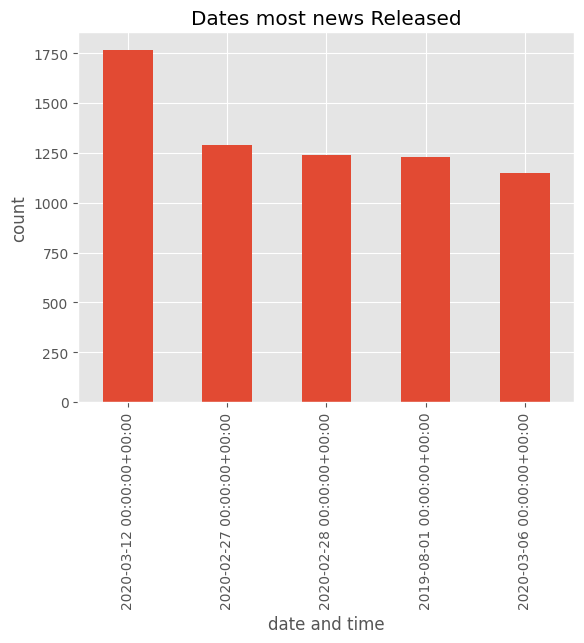

In [28]:
ax= df['date'].value_counts() \
        .head() \
        .plot(kind= "bar" , title="Dates most news Released")
ax.set_xlabel('date and time')
ax.set_ylabel('count')

Text(0, 0.5, 'count')

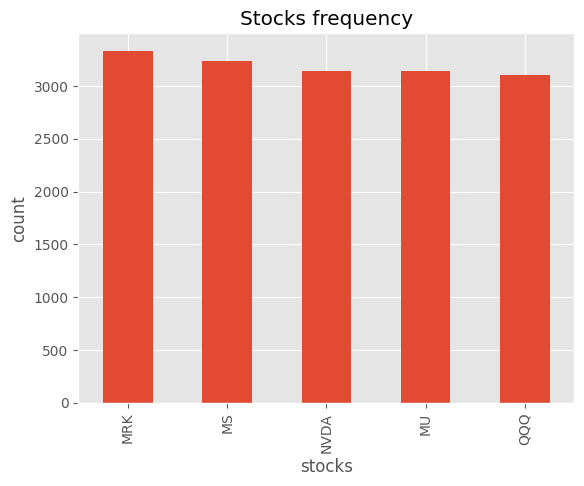

In [29]:
ax= df['stock'].value_counts() \
        .head() \
        .plot(kind= "bar" , title="Stocks frequency")
ax.set_xlabel('stocks')
ax.set_ylabel('count')

Descriptive Analysis

In [30]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [32]:
# Add headline length
df['headline_len'] = df['headline'].astype(str).str.len()


In [33]:
df.head()

,headline,url,publisher,date,stock,headline_len
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87


In [34]:
df['headline_len'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64

In [36]:
# count articles per publisher
df['publisher'].value_counts().head(20)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

In [37]:
df['stock'].value_counts()

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
DWM        1
DWAT       1
DVP        1
DXJS       1
DXJR       1
Name: count, Length: 6204, dtype: int64

In [39]:
df['day']=df['date'].dt.date
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['weekday']=df['date'].dt.day_name()
df['hour']=df['date'].dt.hour

In [40]:
df.head()

,headline,url,publisher,date,stock,headline_len,day,year,month,weekday,hour
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,2020-06-05,2020,6,Friday,14
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,2020-06-03,2020,6,Wednesday,14
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,2020-05-26,2020,5,Tuesday,8
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,2020-05-22,2020,5,Friday,16
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,2020-05-22,2020,5,Friday,15


In [49]:
daily_counts=df.groupby('day').size()
daily_counts

day
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Length: 3955, dtype: int64

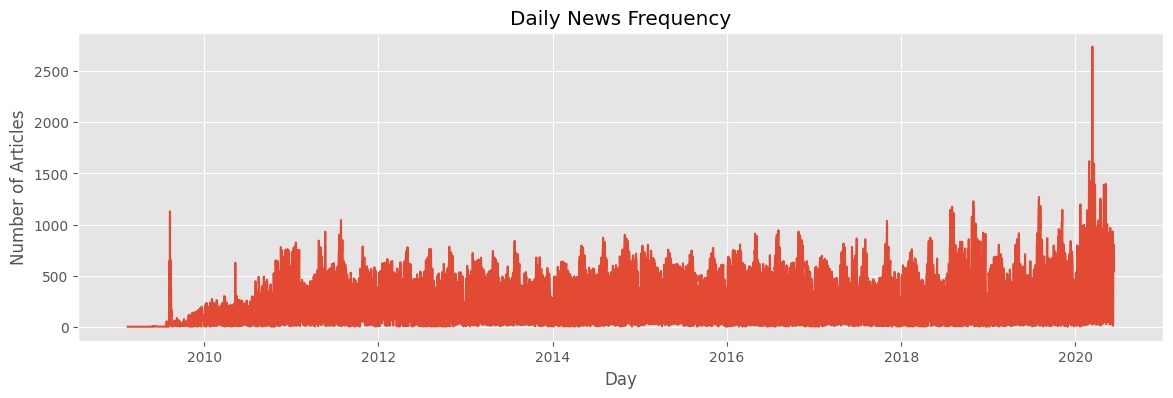

In [52]:
plt.figure(figsize=(14,4))
daily_counts.plot()
plt.title("Daily News Frequency")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()